In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# read csv file
data = pd.read_csv('us_retail_sales.csv')

# show the first 5 rows
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# strip any whitespace from column names
data.columns = data.columns.str.strip()

# reshape the data
data_melted = pd.melt(data, id_vars=['YEAR'], var_name='MONTH', value_name='SALES')

# convert the month abbreviations to numbers for better sorting
data_melted['MONTH_NBR'] = pd.to_datetime(data_melted['MONTH'], format='%b').dt.month

# Sort the data by year and month
data_melted = data_melted.sort_values(by=['YEAR', 'MONTH_NBR'])

# print the first 5 rows
data_melted.head()


,YEAR,MONTH,SALES,MONTH_NBR
0,1992,JAN,146925.0,1
30,1992,FEB,147223.0,2
60,1992,MAR,146805.0,3
90,1992,APR,148032.0,4
120,1992,MAY,149010.0,5


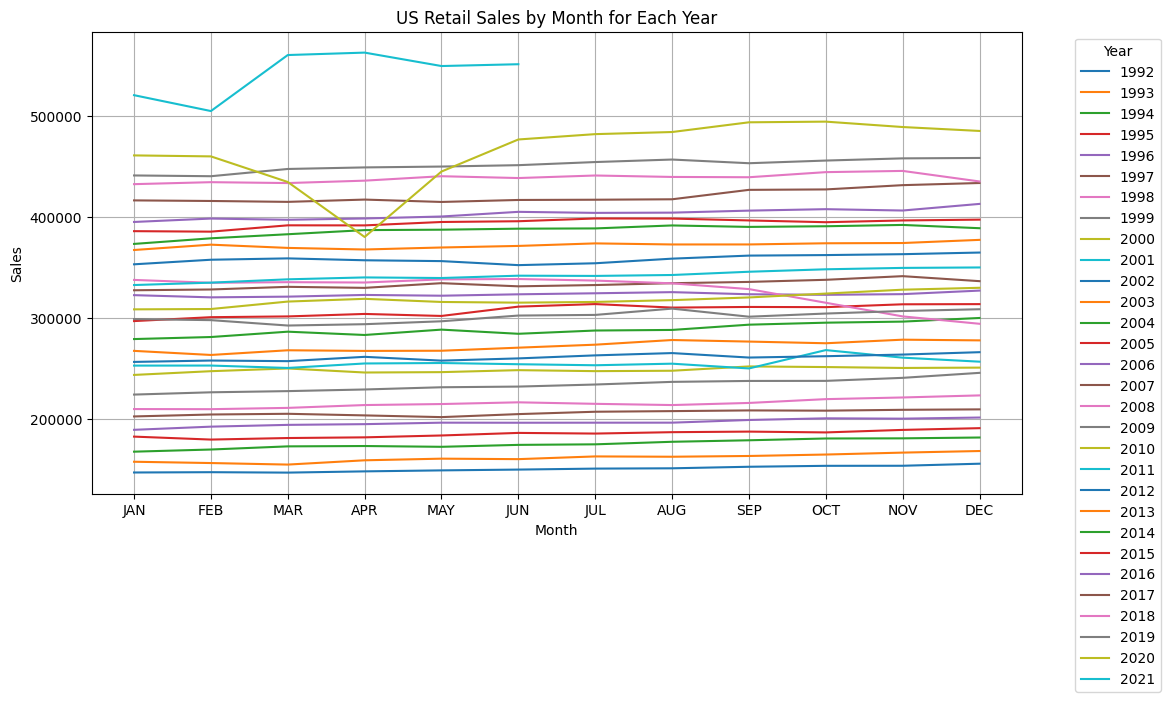

In [64]:
# Plotting the data by year
plt.figure(figsize=(12, 6))
for year in data['YEAR'].unique():
    yearly_data = data_melted[data_melted['YEAR'] == year]
    plt.plot(yearly_data['MONTH'], yearly_data['SALES'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('US Retail Sales by Month for Each Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


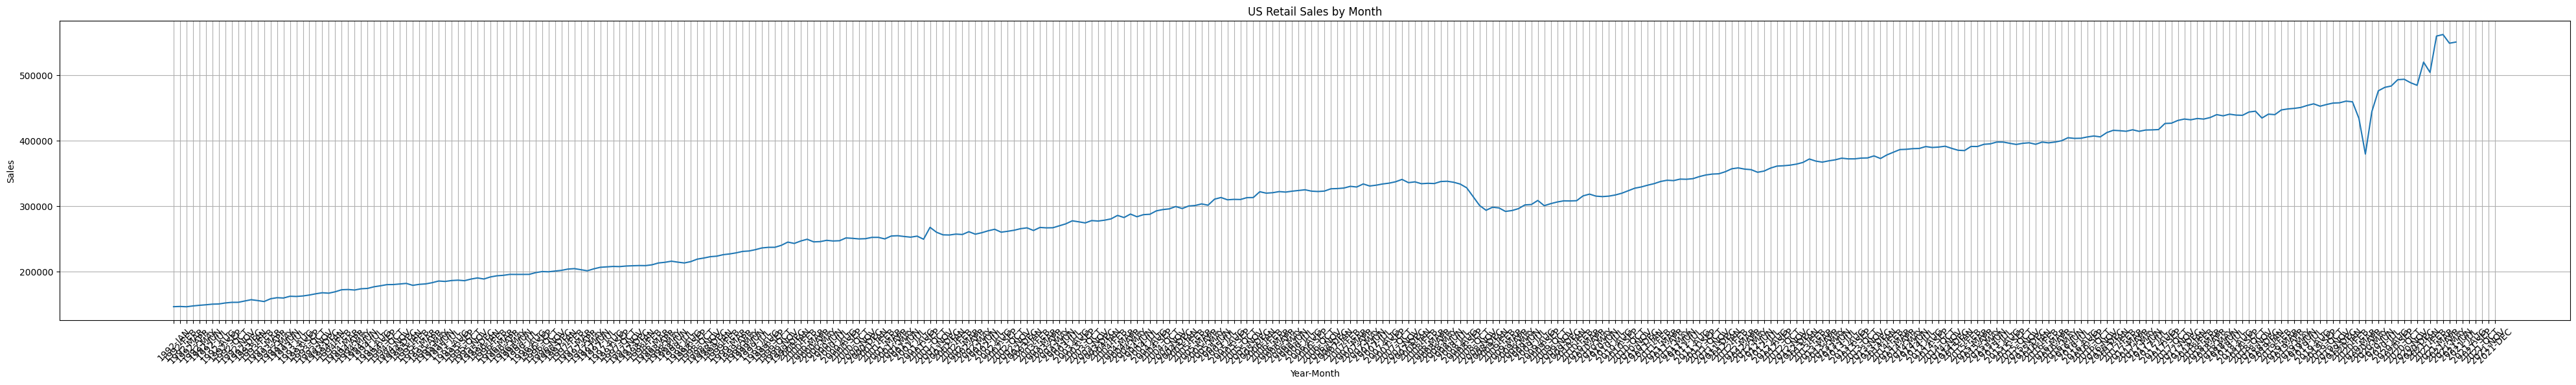

In [70]:
# plot the date as one continuous line
plt.figure(figsize=(50, 6))
plt.plot(data_melted['YEAR'].astype(str) + '-' + data_melted['MONTH'], data_melted['SALES'])
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('US Retail Sales by Month')
plt.xticks(rotation=45)  # rotate x-axis labels

plt.grid(True)
plt.show()


In [99]:
# Split this data into a training and test set. Use the last year of data 
# (July 2020 – June 2021) of data as your test set and the rest as your training set.

# filter the training set (all data except July 2020 - June 2021)
train_set = data_melted[~((data_melted['YEAR'] == 2020) & (data_melted['MONTH_NBR'] >= 7)) &
                        ~(data_melted['YEAR'] == 2021)]

# print the first 5 rows
train_set.head()


,YEAR,MONTH,SALES,MONTH_NBR
0,1992,JAN,146925.0,1
30,1992,FEB,147223.0,2
60,1992,MAR,146805.0,3
90,1992,APR,148032.0,4
120,1992,MAY,149010.0,5


In [100]:
train_set.tail()

,YEAR,MONTH,SALES,MONTH_NBR
58,2020,FEB,459610.0,2
88,2020,MAR,434281.0,3
118,2020,APR,379892.0,4
148,2020,MAY,444631.0,5
178,2020,JUN,476343.0,6


In [101]:
# filter the test set (July 2020 - June 2021)
test_set = data_melted[((data_melted['YEAR'] == 2020) & (data_melted['MONTH_NBR'] >= 7)) | 
                       ((data_melted['YEAR'] == 2021) & (data_melted['MONTH_NBR'] <= 6))]

# print test set
test_set


,YEAR,MONTH,SALES,MONTH_NBR
208,2020,JUL,481627.0,7
238,2020,AUG,483716.0,8
268,2020,SEP,493327.0,9
298,2020,OCT,493991.0,10
328,2020,NOV,488652.0,11
358,2020,DEC,484782.0,12
29,2021,JAN,520162.0,1
59,2021,FEB,504458.0,2
89,2021,MAR,559871.0,3
119,2021,APR,562269.0,4


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# training data
train_set['DATE'] = pd.to_datetime(train_set['YEAR'].astype(str) + '-' + train_set['MONTH_NBR'].astype(str) + '-01')
train_set.set_index('DATE', inplace=True)
train_set['TIME_INDEX'] = np.arange(len(train_set))

# test data
test_set['DATE'] = pd.to_datetime(test_set['YEAR'].astype(str) + '-' + test_set['MONTH_NBR'].astype(str) + '-01')
test_set.set_index('DATE', inplace=True)
test_set['TIME_INDEX'] = np.arange(len(train_set), len(train_set) + len(test_set))

# define the features and target
X_train = train_set[['TIME_INDEX']]
y_train = train_set['SALES']
X_test = test_set[['TIME_INDEX']]
y_test = test_set['SALES']



C:\Users\super\AppData\Local\Temp\ipykernel_19276\3101272692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['DATE'] = pd.to_datetime(train_set['YEAR'].astype(str) + '-' + train_set['MONTH_NBR'].astype(str) + '-01')
C:\Users\super\AppData\Local\Temp\ipykernel_19276\3101272692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['TIME_INDEX'] = np.arange(len(train_set))  # Create a time index
C:\Users\super\AppData\Local\Temp\ipykernel_19276\3101272692.py:11: SettingWithCopyWarning: 
A

In [125]:
# train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# make predictions
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)


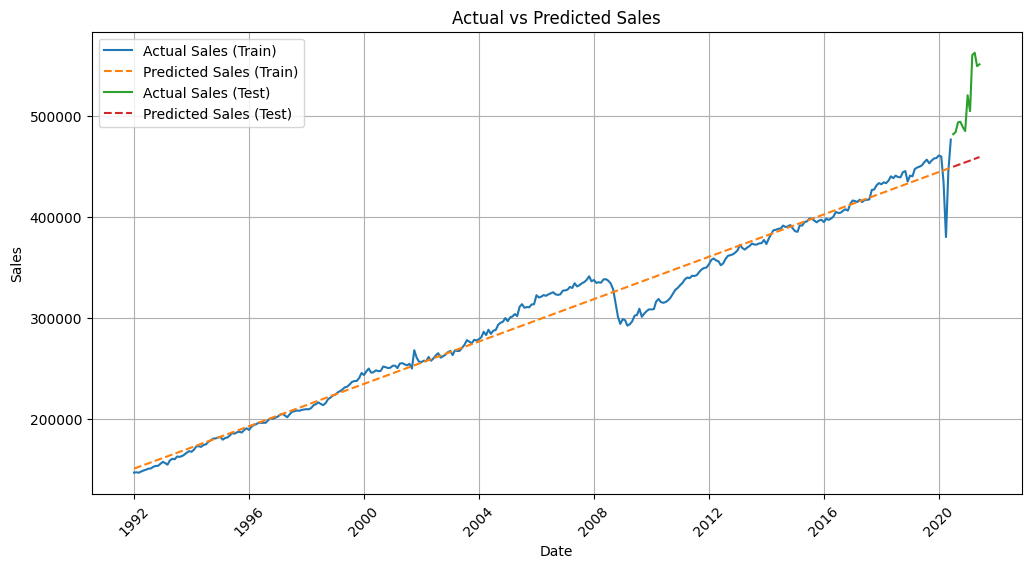

In [129]:
# plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual Sales (Train)')
plt.plot(y_train.index, train_predictions, label='Predicted Sales (Train)', linestyle='--')
plt.plot(y_test.index, y_test, label='Actual Sales (Test)')
plt.plot(y_test.index, test_predictions, label='Predicted Sales (Test)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [130]:
# evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

test_rmse

66432.62829228971